**<font size="5"> Optimizing Digital Strategy: A Comparative Analysis of Customer Engagement on Mobile App vs. Website for a New York-Based Clothing Retailer</font>**

An e-commerce company based in New York, specializing in clothing sales, operates through both a website and a mobile app. While customers often visit the physical store with personal stylists to explore and try on clothes, they typically place their orders later through the website or mobile app. The company seeks to optimize its digital efforts by determining which platform—mobile app or website—warrants greater focus to enhance customer engagement and sales. To achieve this, they have engaged data scientists to analyze customer behavior, preferences, and purchasing patterns across both platforms, with the goal of guiding strategic decisions on resource allocation and platform development

**<font size="4">DATA SET**</font> 

https://www.kaggle.com/datasets/srolka/ecommerce-customers/data  


<!-- ![Ecommerce](ec.jpeg)   -->
<div style="text-align: center;">
    <img src="ec.jpeg" alt="Description of Image" style="display: inline-block;">
</div>

**<font size="4">Data Features Description:**</font>

- **Avg. Session Length:**
  
   - Average session of in-store style advice sessions.
  
- **Time on App:**

    - Average time spent on App in minutes.


- **Time on Website:**

  - Average time spent on Website in minutes

  
- **Length of Membership:**

  - How many years the customer has been a member
 
- **Yearly Amount Spent**

  - How much customers spent either on Ecommerce website or mobile APP.

**<font size="4">Contents of Project** </font>

- Importing Libraries and Datasets

- EDA and Data Visualization

- Correlation measures

- Feature Segmentation: Target vs. Predictors

- Training and Testing Set Allocation

- Model Integration

- Evaluation and Accuracy measures

- Conclusion

**<font size="4">Let’s dive into the world of Data Science</font>**

In [402]:
# Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

**EDA and Data Visualizations**

In [403]:
#Load Dataset
customers = pd.read_csv("Ecommerce Customers.csv")
#TO get top 5 ros of dataset [0 to 4]
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [404]:
#Rows and Columns in Dataset..
print("Data has {} rows and {} columns.".format(customers.shape[0], customers.shape[1]))


Data has 500 rows and 8 columns.


In [408]:
#Data information
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


- **The dataset consists of 500 entries with 8 columns, including customer information (Email, Address, Avatar) and numerical features (Avg. Session Length, Time on App, Time on Website, Length of Membership, Yearly Amount Spent)**.

- **All numerical columns are of type float64.**

In [411]:
#Data Description
customers.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg. Session Length,500.0,33.053194,0.992563,29.532429,32.341822,33.082008,33.711985,36.139662
Time on App,500.0,12.052488,0.994216,8.508152,11.388153,11.983231,12.753850,15.126994
Time on Website,500.0,37.060445,1.010489,33.913847,36.349257,37.069367,37.716432,40.005182
Length of Membership,500.0,3.533462,0.999278,0.269901,2.930450,3.533975,4.126502,6.922689
Yearly Amount Spent,500.0,499.314038,79.314782,256.670582,445.038277,498.887875,549.313828,765.518462


- **The dataset shows that the average session length, time on app, and time on website are fairly consistent across users, with standard deviations close to 1.**

- **The yearly amount spent has a mean of approximately $499, with significant variability (standard deviation ~79), indicating diverse spending patterns among customers.**

**DATA PREPROCESSING**

**1. Missing Values**

In [416]:
#TO check the missing values
percent_NA = (customers.isnull().sum()/customers.isnull().count()).sort_values(ascending=False)
percent_NA

Email                   0.0
Address                 0.0
Avatar                  0.0
Avg. Session Length     0.0
Time on App             0.0
Time on Website         0.0
Length of Membership    0.0
Yearly Amount Spent     0.0
dtype: float64

- **The dataset is already cleaned , there is not any missing value in dataset.**


**UNIQUE ELEMENTS**

In [420]:
#TO check the unique values in all features
customers.nunique()

Email                   500
Address                 500
Avatar                  138
Avg. Session Length     500
Time on App             500
Time on Website         500
Length of Membership    500
Yearly Amount Spent     500
dtype: int64

- **The dataset has complete data for most features except for the Avatar column, which has only 138 entries, indicating missing values for this feature.**

- **All other columns have 500 entries.**

**Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns**

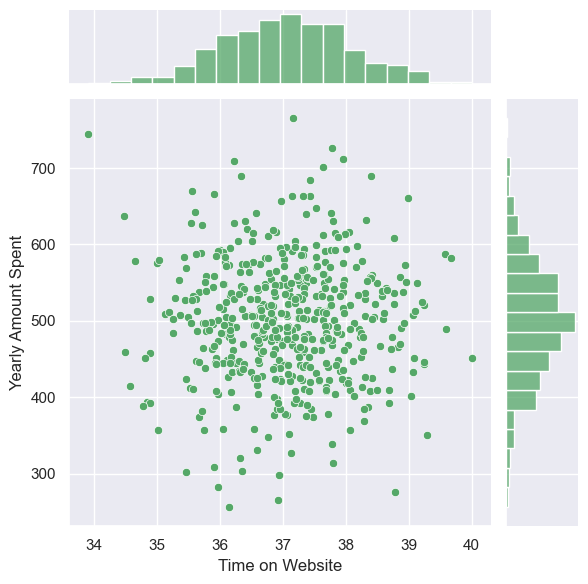

In [648]:
#The scatter plot helps to visualize any potential correlation between these two variables.
#The plots along the top and right edges show the distribution of Time on Website and Yearly Amount Spent, respectively.
#These are typically histograms or kernel density estimates (KDEs), which give insight into the distribution of each individual variable.

sns.jointplot(x='Time on Website',y ='Yearly Amount Spent', data = customers, color='g')

**Use seaborn to create a jointplot to compare the Time on App and Yearly Amount Spent columns**

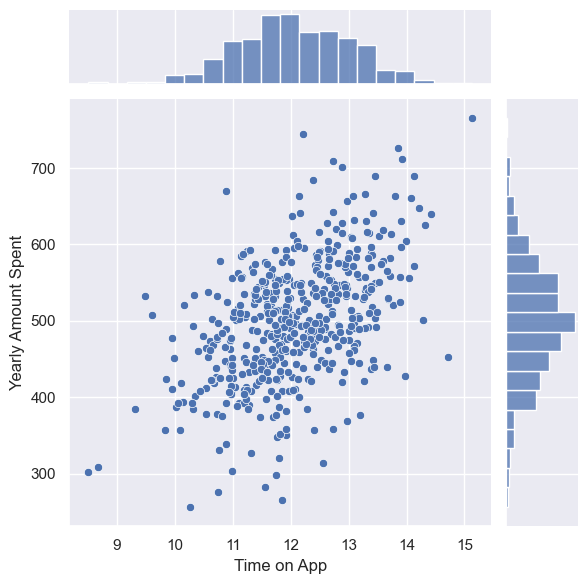

In [424]:
sns.jointplot(x='Time on App',y ='Yearly Amount Spent', data = customers)

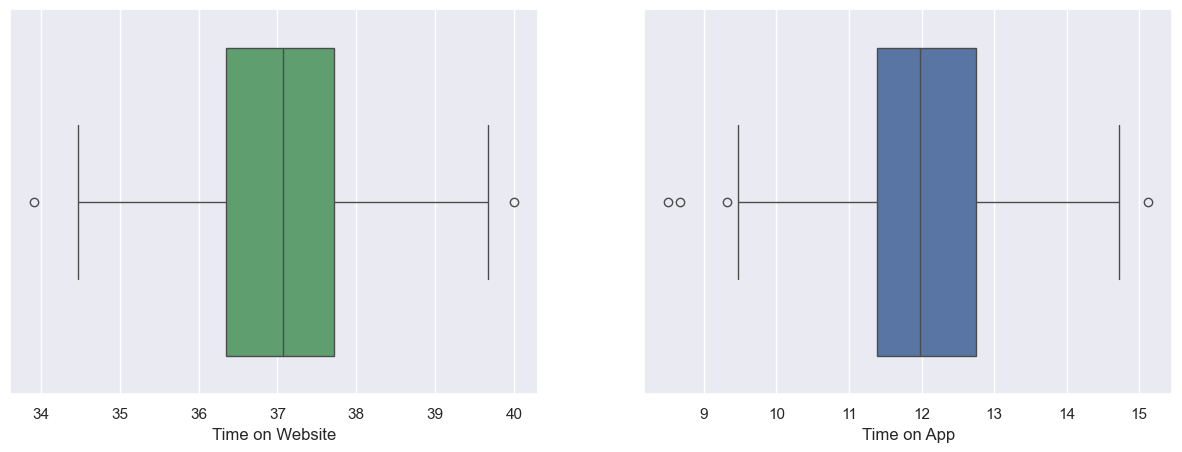

In [652]:
fig, ax =plt.subplots(1,2,figsize=(15, 5))

sns.boxplot(x=customers['Time on Website'], ax=ax[0],color='g')
sns.boxplot(x=customers['Time on App'], ax=ax[1])

fig.show()

**Use jointplot to generate a 2D hex bin plot comparing 'Time on App' with 'Length of Membership**

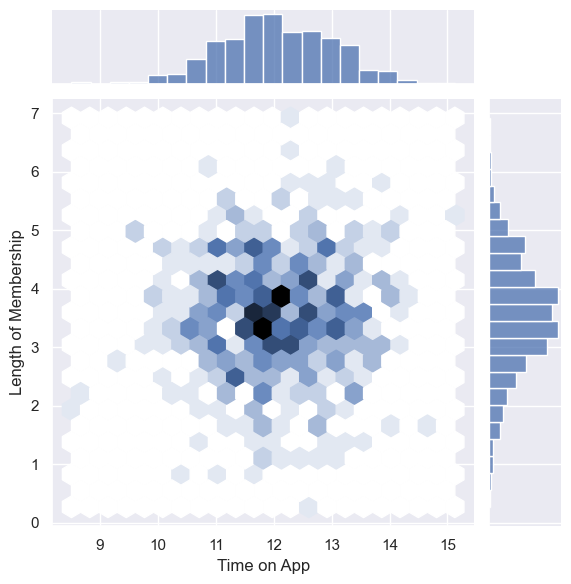

In [650]:
sns.jointplot(x='Time on App',y ='Length of Membership', data = customers, kind='hex',color='b')

**<font size="3">Let's explore these types of relationships across the entire data set. Use pairplot to recreate the plot below</font>**

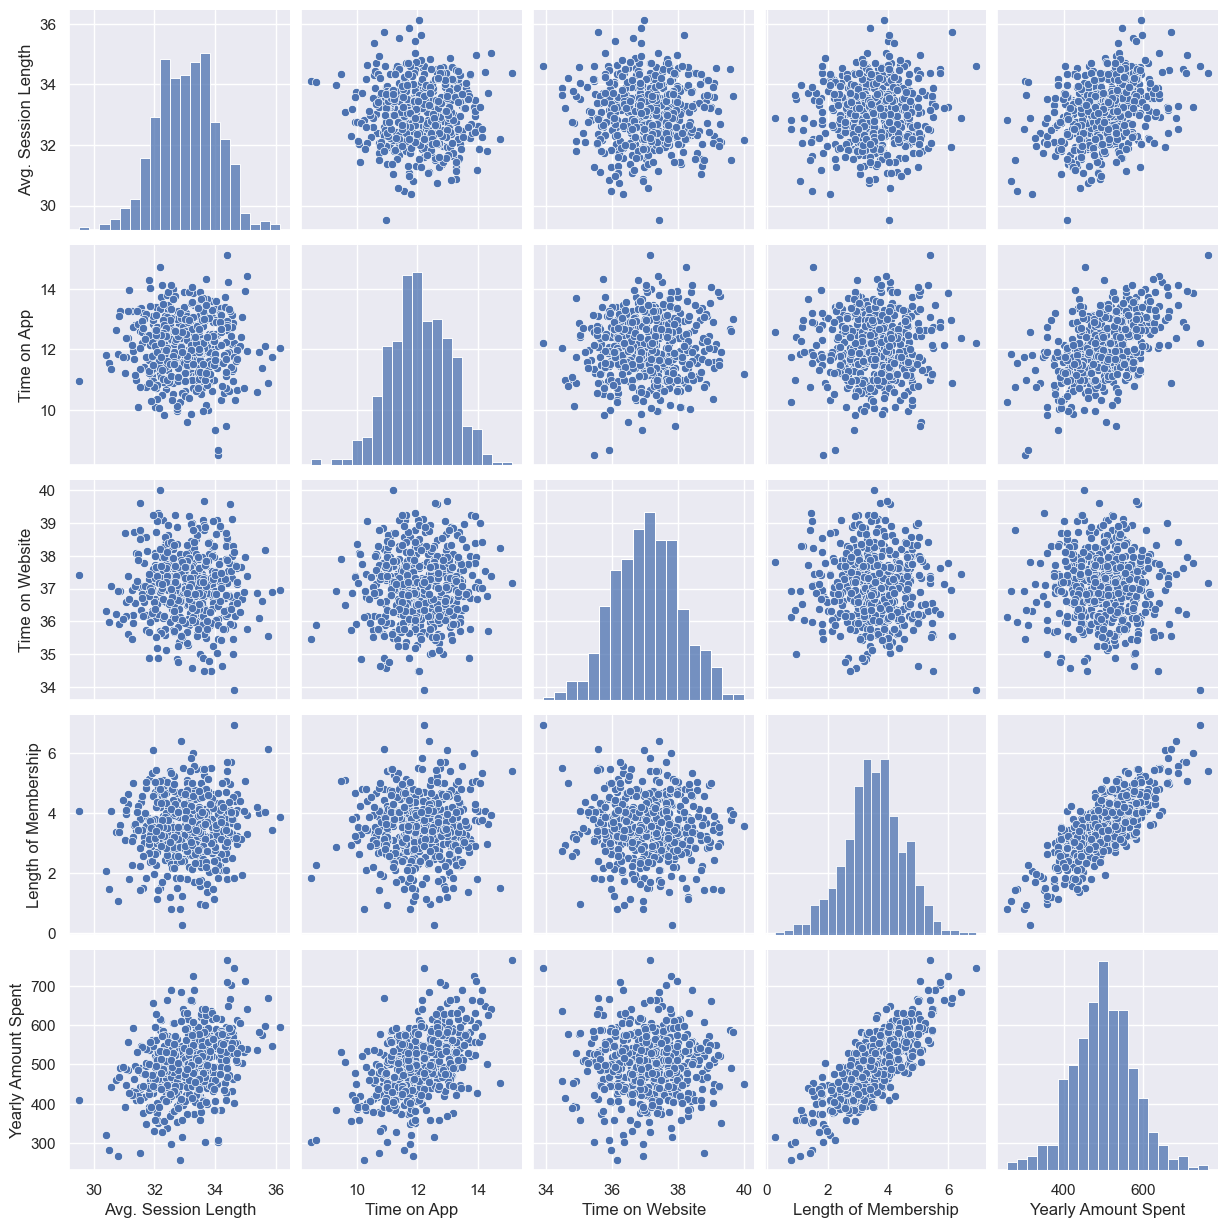

In [634]:
sns.pairplot(customers)

- **"Length of Membership" is the best correlated.**

- **The majority of our features exhibit a normal distribution.**

**Heatmap to get the correlation among all numerical features**

<Axes: >

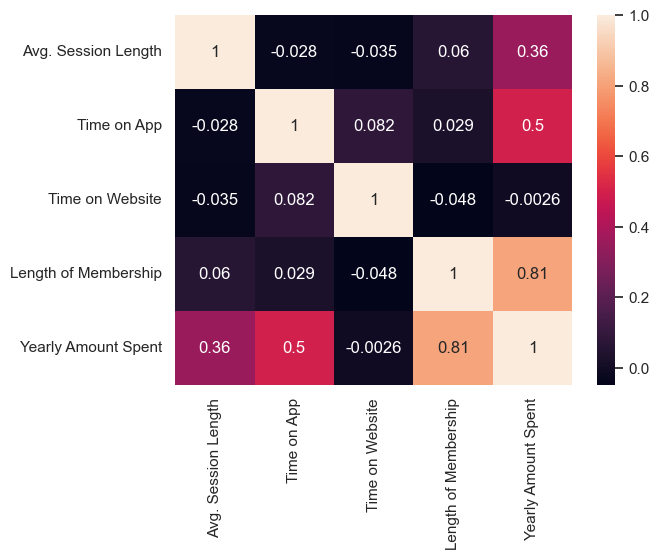

In [432]:
# Only select numerical data to work further
numeric_df = customers.select_dtypes(include=[np.number])

# Draw heatmap on the numerical data.
sns.heatmap(numeric_df.corr(),annot=True)

- **As our major focuses are time on mobile App and Time on Website:**
  
   - **The correlation of "Time on App" with "Yearly amount spent is more than the "Correlation of Time spent on website" with "Yearly amount spent"**

**To check the relationship of the most correlate feature "Length of membership" with "Yearly Amount Spent"**

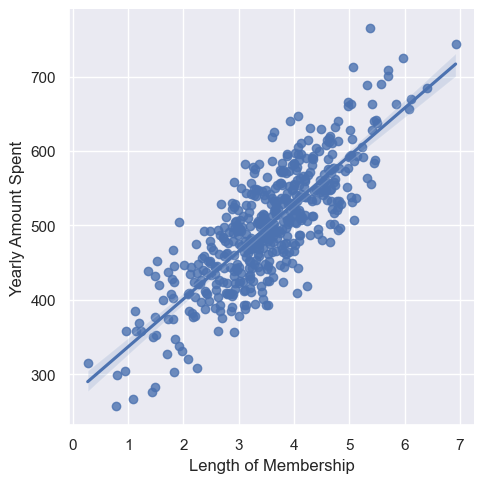

In [610]:
sns.set(color_codes=True)
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent',data=customers)

**Feature Segmentation: Target vs. Predictors**

In [438]:
#There are 04 independant variables
X = customers[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]

**To select dependant variable for model**

In [440]:
y= customers['Yearly Amount Spent']


**Training and Testing Set Allocation by importing the train_test_split Library**

In [442]:
from sklearn.model_selection import train_test_split

In [455]:
#80 % data is allocated for traaining purpose and 20 % is alllocated for testiing purpose

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

**As the Dataset is continuous and linear, so we will use the Linear Regression Model.**

**Importing Linear Regression Model**

In [458]:
from sklearn.linear_model import LinearRegression

In [460]:
linear_model = LinearRegression()

In [462]:
linear_model.fit(X_train, y_train )

LinearRegression()

In [464]:
predictions = linear_model.predict(X_test)

**To get the actual and predicted values in one frame.**

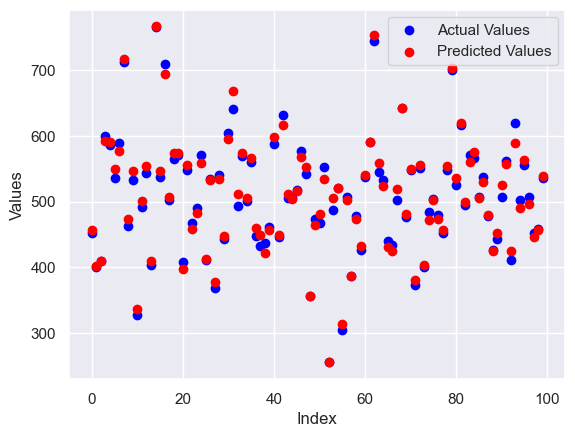

In [560]:
# Plot actual values in one color
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Values')

# Plot predicted values in another color
plt.scatter(range(len(predictions)), predictions, color='red', label='Predicted Values')

# Labels and legend
plt.ylabel('Values')
plt.xlabel('Index')
plt.legend()
plt.show()

**How much the "Predicted Values" match with "True Values".**

Text(0.5, 0, 'Y test')

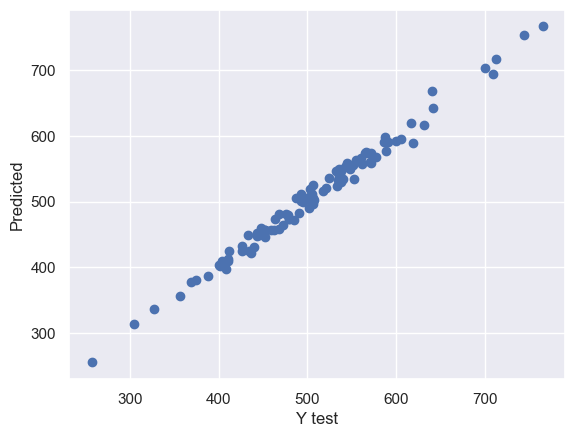

In [556]:
plt.scatter(y_test, predictions)
plt.ylabel('Predicted')
plt.xlabel('Y test')

**Evaluation Metrics: MAE, MSE, and RMSE for Model Performance**

In [568]:
import sklearn.metrics as metrics
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, predictions)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, predictions)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, predictions))))

MAE: 7.758907540457838
MSE: 91.82335857016865
RMSE: 9.582450551407435


- **These metrics suggest that while predictions are relatively accurate, there are significant errors in some predictions.**

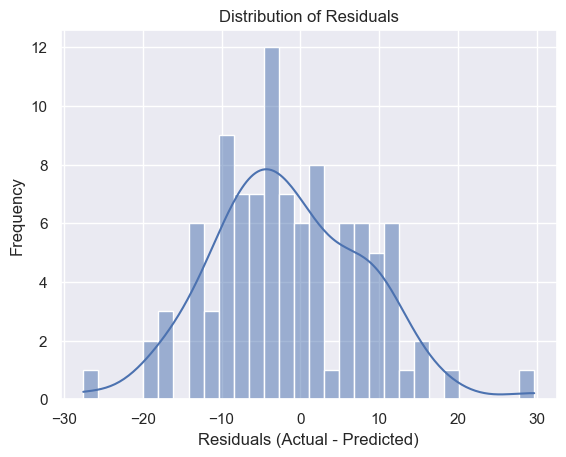

In [564]:
# sns.distplot((y_test-predictions))
# Plot distribution of residuals
sns.histplot(y_test - predictions, kde=True, bins=30,c)

# Labels and title
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

**The "Residual" is normally distributed around zero with a little flutuation, it shows that the model performs well.**

**Model Accuracy Score on Test Data**

In [578]:
from sklearn.linear_model import LinearRegression
linear_model.score(X_test,y_test)

0.9881661299145554

- **The 98 Score indicates that the model explains 98% of the variance in the test data.**

   - **This high score suggests that the model is highly accurate in predicting the target variable based on the features in the test set,** 
   -  **with only 2% of the variation unexplained by the model.**

**Conclusion**

To determine the focus for efforts, whether on the mobile app or website? Or maybe that doesn't even really matter, and Membership Time is what is really important. We need to analyze the coefficient, this will help us understand which variables have the most significant impact on our target outcome. Let's dive into the coefficients to gain insights and make an informed decision.

In [589]:
pd.DataFrame(linear_model.coef_ , X.columns, columns=['Coeffecient'])

,Coeffecient
Avg. Session Length,26.029489
Time on App,38.709835
Time on Website,0.356184
Length of Membership,61.472809


- **The Coeffient of the feature "Time on App" is 38.71 which shows the high impact on the target feature "Yearly amount spent"**

- **COnsequently, the company should focus on the mobile app.**



**Testing with new data**

In [574]:
def make_prediction(avg_session,app_time,web_time,membership_length):
    data = {
        'Avg. Session Length': avg_session,
        'Time on App': app_time,
        'Time on Website': web_time,
        'Length of Membership': membership_length,
    }
    df12 = pd.DataFrame(data, index=[0])
    display(df12)
    prediction = lm.predict(df12).round(2)[0]
    return f"Yearly Amount Spent: Rs.{prediction}"

In [479]:
make_prediction(34.497268 , 12.655651 , 39.577668 , 4.082621)

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621


'Yearly Amount Spent: Rs.594.46'